### This notebook serves to explore the cattle dataset and find patterns between our explanatory variables and the target variable

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

1. Importing Dataset from Kaggle 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shahhet2812/cattle-health-and-feeding-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\henib\.cache\kagglehub\datasets\shahhet2812\cattle-health-and-feeding-data\versions\1


In [3]:
import os

# Print the path (you already have it)
print("Path to dataset files:", path)

# List all files in the downloaded directory
files = os.listdir(path)
print("\nFiles in dataset directory:")
for f in files:
    print(f"  {f}")



Path to dataset files: C:\Users\henib\.cache\kagglehub\datasets\shahhet2812\cattle-health-and-feeding-data\versions\1

Files in dataset directory:
  global_cattle_disease_detection_dataset.csv
  global_cattle_milk_yield_prediction_dataset.csv


In [4]:
# Load the CSV file into a DataFrame
cattle = pd.read_csv(os.path.join(path, 'global_cattle_milk_yield_prediction_dataset.csv'))
df = cattle.copy()


In [5]:
df.shape
df.head()

,Cattle_ID,Breed,Region,Country,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,...,Anthrax_Vaccine,IBR_Vaccine,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Milk_Yield_L
0,CATTLE_000001,Tharparkar,Africa,CA,Tropical,Intensive,32,259.9,4,Late,...,1,0,0,0,4.88,3.0,24,2023-02-06,FARM_0825,3.08
1,CATTLE_000002,Africander,South_America,ET,Arid,Semi_Intensive,63,593.9,6,Early,...,0,0,1,1,3.52,2.5,24,2022-10-31,FARM_0106,2.00
2,CATTLE_000003,Holstein-Friesian,Oceania,KE,Temperate,Intensive,132,675.4,3,Mid,...,1,0,1,0,11.28,2.5,12,2024-11-01,FARM_0201,14.06
3,CATTLE_000004,Fleckvieh,Europe_NA,BR,Tropical,Semi_Intensive,73,260.5,5,Late,...,0,0,0,0,10.63,4.0,8,2023-07-07,FARM_0174,12.74
4,CATTLE_000005,Danish_Red,Oceania,US,Subtropical,Extensive,50,477.8,6,Early,...,0,1,1,1,16.99,2.0,12,2024-09-20,FARM_0028,15.64


Our dataset contains 250K rows and 37 columns, suitable for applying deep learning algorithms. 

In [6]:
df.columns 

Index(['Cattle_ID', 'Breed', 'Region', 'Country', 'Climate_Zone',
       'Management_System', 'Age_Months', 'Weight_kg', 'Parity',
       'Lactation_Stage', 'Days_in_Milk', 'Feed_Type', 'Feed_Quantity_kg',
       'Feeding_Frequency', 'Water_Intake_L', 'Walking_Distance_km',
       'Grazing_Duration_hrs', 'Rumination_Time_hrs', 'Resting_Hours',
       'Ambient_Temperature_C', 'Humidity_percent', 'Season', 'Housing_Score',
       'FMD_Vaccine', 'Brucellosis_Vaccine', 'HS_Vaccine', 'BQ_Vaccine',
       'Anthrax_Vaccine', 'IBR_Vaccine', 'BVD_Vaccine', 'Rabies_Vaccine',
       'Previous_Week_Avg_Yield', 'Body_Condition_Score',
       'Milking_Interval_hrs', 'Date', 'Farm_ID', 'Milk_Yield_L'],
      dtype='object')

By taking a look at the columns, we observe some features related to the health of the cattle, namely those related to the vaccine history of the animals. 

In [7]:
# Verifying there are no missing values
df.isna().sum()

Cattle_ID                  0
Breed                      0
Region                     0
Country                    0
Climate_Zone               0
Management_System          0
Age_Months                 0
Weight_kg                  0
Parity                     0
Lactation_Stage            0
Days_in_Milk               0
Feed_Type                  0
Feed_Quantity_kg           0
Feeding_Frequency          0
Water_Intake_L             0
Walking_Distance_km        0
Grazing_Duration_hrs       0
Rumination_Time_hrs        0
Resting_Hours              0
Ambient_Temperature_C      0
Humidity_percent           0
Season                     0
Housing_Score              0
FMD_Vaccine                0
Brucellosis_Vaccine        0
HS_Vaccine                 0
BQ_Vaccine                 0
Anthrax_Vaccine            0
IBR_Vaccine                0
BVD_Vaccine                0
Rabies_Vaccine             0
Previous_Week_Avg_Yield    0
Body_Condition_Score       0
Milking_Interval_hrs       0
Date          

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_Months,250000.0,83.450064,34.642854,24.0,53.00,83.00,113.00,143.00
Weight_kg,250000.0,500.118658,144.458104,250.0,374.80,500.40,625.50,750.00
Parity,250000.0,3.500152,1.706973,1.0,2.00,3.00,5.00,6.00
Days_in_Milk,250000.0,182.277176,105.104091,1.0,91.00,182.00,273.00,364.00
Feed_Quantity_kg,250000.0,12.015175,3.959998,3.0,9.30,12.00,14.70,25.00
Feeding_Frequency,250000.0,3.000660,1.412508,1.0,2.00,3.00,4.00,5.00
Water_Intake_L,250000.0,65.074433,19.699541,20.0,51.50,65.00,78.50,120.00
Walking_Distance_km,250000.0,4.037237,1.927741,0.5,2.66,4.01,5.35,12.00
Grazing_Duration_hrs,250000.0,6.053517,2.867527,1.0,4.00,6.00,8.00,14.00
Rumination_Time_hrs,250000.0,8.010312,1.953905,4.0,6.60,8.00,9.30,14.00


Summary statstics of each column enables us to identify inconsistencies in the data. There seeems to be non in our dataset but further investigation is needed to confidently verify this.

In [9]:
# Seperating categorical and numerical variables. 
categorical_variables = df.dtypes[df.dtypes.values == 'object'].index.to_list()
numerical_variables = df.dtypes[df.dtypes.values != 'object'].index.to_list()

In [23]:
# Taking a look at categorical variables 
df[categorical_variables].describe().T

,count,unique,top,freq
Cattle_ID,250000,250000,CATTLE_249984,1
Breed,250000,40,Red_Poll_Africa,6439
Region,250000,6,Oceania,41837
Country,250000,15,ET,16892
Climate_Zone,250000,6,Temperate,41987
Management_System,250000,5,Intensive,50322
Lactation_Stage,250000,3,Mid,100008
Feed_Type,250000,8,Dry_Fodder,31569
Season,250000,5,Summer,50293
Date,250000,1095,2024-03-16,274


There seems to be 250000 unique cattles in the dataset. 

In [11]:
health_features = ['FMD_Vaccine', 'Brucellosis_Vaccine', 'HS_Vaccine', 'BQ_Vaccine','Anthrax_Vaccine', 'IBR_Vaccine', 'BVD_Vaccine', 'Rabies_Vaccine']
df.drop (columns = health_features, inplace = True)


Dropping health related features since we're interested in predicting the milk yield and not the health condition of the cattle.

In [12]:
# Defining explanatory variables and target variable
y = df['Milk_Yield_L'] 
X = df.drop(columns = ['Milk_Yield_L'])

#### Let's start exploring our data by focusing on our target: Milk Yield in Liter.

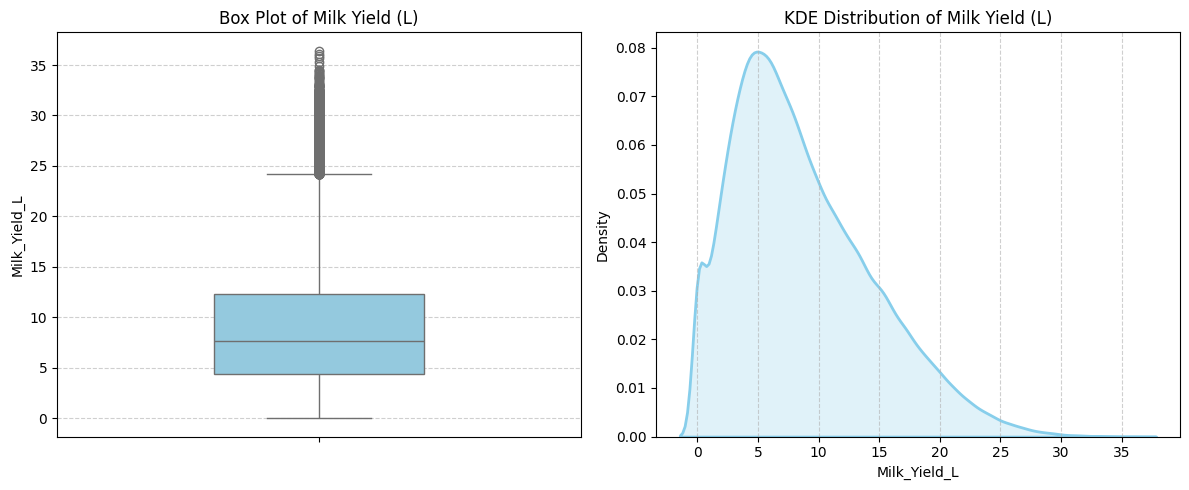

In [13]:
plt.figure(figsize=(12, 5))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y="Milk_Yield_L", color="skyblue", width=0.4)
plt.title("Box Plot of Milk Yield (L)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="Milk_Yield_L", fill=True, color="skyblue", linewidth=2)
plt.title("KDE Distribution of Milk Yield (L)")
plt.grid(True, axis = 'x', linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()

Our target distribution is skewed to the left with the presence of outliers in the right. Data is centered around 5 while the mean is at 8. which indicates the presence of outliers as also shown by the boxplot.  

In [24]:
(df['Milk_Yield_L'] > 25).sum() 

high_yield = df[df['Milk_Yield_L'] > 25]
print(high_yield['Region'].value_counts())
print(high_yield['Country'].value_counts())
print(high_yield['Breed'].value_counts())

Best_Breed = df[df['Breed'] == 'Holstein-Friesian']
print(Best_Breed['Region'].value_counts())
print(Best_Breed['Country'].value_counts())


Region
Africa           377
Europe_NA        375
Global           363
Oceania          362
South_Asia       341
South_America    335
Name: count, dtype: int64
Country
BR    163
FR    158
CA    152
ET    150
PK    150
NZ    147
US    143
UK    141
CN    140
AU    140
BD    139
IN    139
KE    137
DE    131
AR    123
Name: count, dtype: int64
Breed
Holstein-Friesian              834
Brown_Swiss                    363
Simmental                      251
Fleckvieh                      242
Norwegian_Red                  157
Danish_Red                      92
Ayrshire                        92
Montbeliarde                    38
Milking_Shorthorn               34
Holstein_Zebu_Cross             22
Jersey                          22
Exotic_Local_Cross               2
Normande                         2
Australian_Friesian_Sahiwal      1
Guernsey                         1
Name: count, dtype: int64
Region
Africa           1053
South_Asia       1052
Global           1052
Oceania          1029
Europ

We tried to explore more the outliers and see if it's related to certain categories.
Only the category Breed has shown unbalanced numbers of cattles.
Other features are balanced.

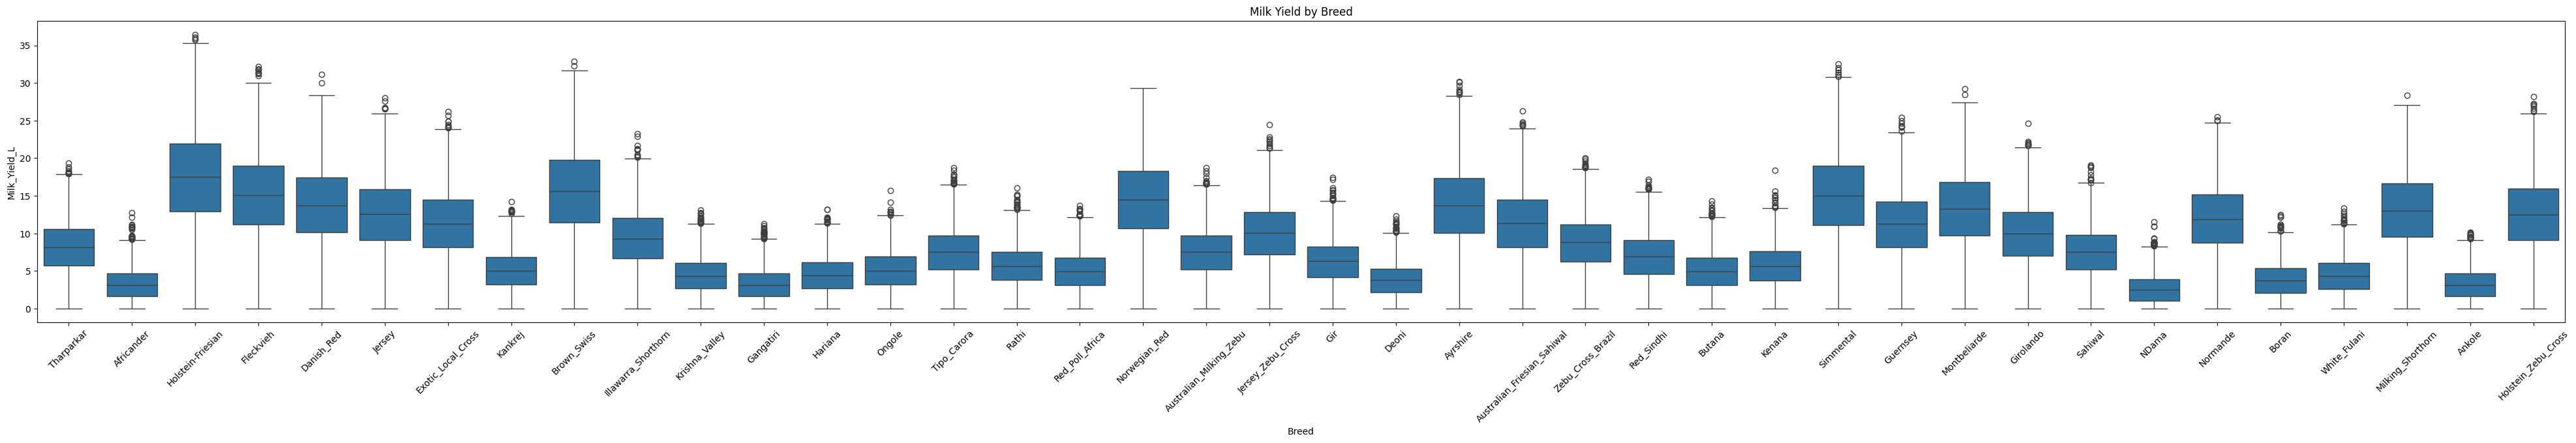

In [22]:
# Example: Milk Yield by Breed
plt.figure(figsize=(50, 6))
sns.boxplot(data=df, x='Breed', y='Milk_Yield_L')
plt.xticks(rotation=45)
plt.title('Milk Yield by Breed')
plt.show()

#### Correlation Matrix (Focus on correlation between numerical variables and target)

C:\Users\henib\AppData\Local\Temp\ipykernel_16244\2935795544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


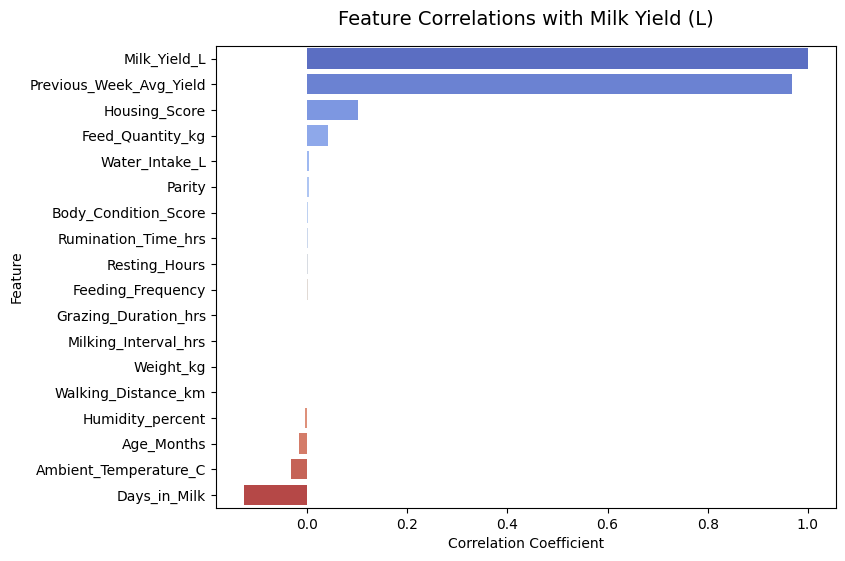

In [14]:
corr_matrix = df.corr(numeric_only=True)

# Display correlations between all variables and the target
target_corr = corr_matrix['Milk_Yield_L'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Feature Correlations with Milk Yield (L)", fontsize=14, pad=15)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

There seems to be high correlation between the average milk yield of the previous week and the milk yield of this week which is totally normal. The housing score and the feed quantity seem to also be highly correlated with the average milk_yield. However, the humidity, the age, the temperature and the days in milk seem to be negatively correlated with the target variable: milk yield. 

### Plotting Highly correlated variables with the target

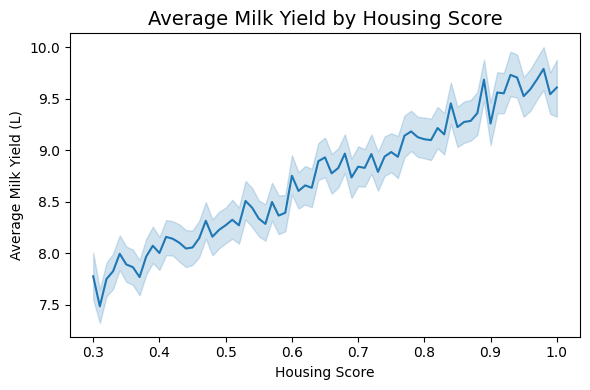

In [15]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Housing_Score', y='Milk_Yield_L')
plt.title('Average Milk Yield by Housing Score', fontsize=14)
plt.xlabel('Housing Score')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

The chart above confirms the positive correlation between the Milk Yield and the housing score. On average, the milk yield goes up as the housing score improves. 

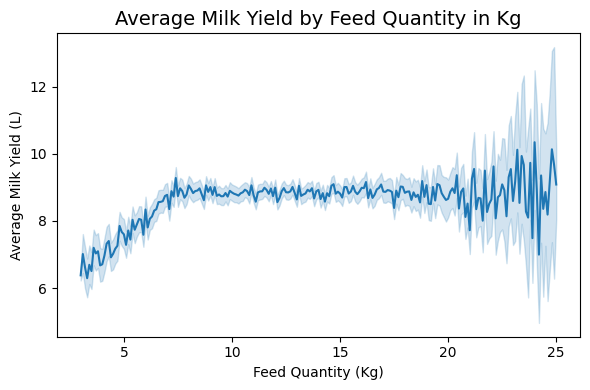

In [16]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Feed_Quantity_kg', y='Milk_Yield_L')
plt.title('Average Milk Yield by Feed Quantity in Kg', fontsize=14)
plt.xlabel('Feed Quantity (Kg)')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

There seems to be a positive correlation at first between the feed quantity in Kg and the Average Milk Yield in Cattle to reach a plateau after a certain level, CI are wide around outliers indicating that the estimate is not reliable enough. 

C:\Users\henib\AppData\Local\Temp\ipykernel_16244\2479044384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Feed_Bin'] = pd.cut(df_plot['Feed_Quantity_kg'], bins=30)


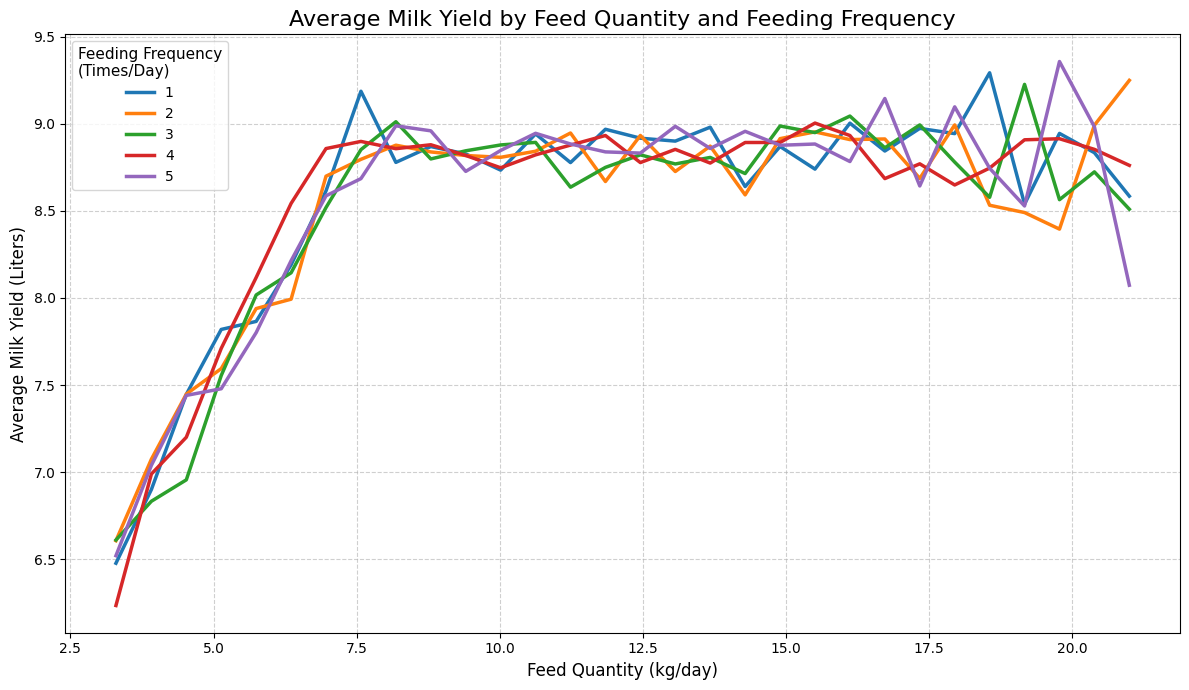

In [31]:
# Optional: Filter extreme feed quantities (e.g., top 1%)
df_plot = df[df['Feed_Quantity_kg'] <= df['Feed_Quantity_kg'].quantile(0.99)]

# 1. Bin feed quantity into intervals (e.g., 0–1, 1–2, ..., up to max)
df_plot['Feed_Bin'] = pd.cut(df_plot['Feed_Quantity_kg'], bins=30)

# 2. Compute average milk yield by bin and feeding frequency
grouped = df_plot.groupby(['Feed_Bin', 'Feeding_Frequency'], observed=True)['Milk_Yield_L'].mean().reset_index()

# 3. Get bin midpoints for smooth x-axis
grouped['Feed_Mid'] = grouped['Feed_Bin'].apply(lambda x: x.mid)

# 4. Sort for clean plotting
grouped = grouped.sort_values(['Feeding_Frequency', 'Feed_Mid'])

# 5. Plot
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=grouped,
    x='Feed_Mid',
    y='Milk_Yield_L',
    hue='Feeding_Frequency',
    palette='tab10',
    linewidth=2.5,
    marker=None  # ensures no points — pure lines
)

plt.title('Average Milk Yield by Feed Quantity and Feeding Frequency', fontsize=16)
plt.xlabel('Feed Quantity (kg/day)', fontsize=12)
plt.ylabel('Average Milk Yield (Liters)', fontsize=12)
plt.legend(title='Feeding Frequency\n(Times/Day)', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

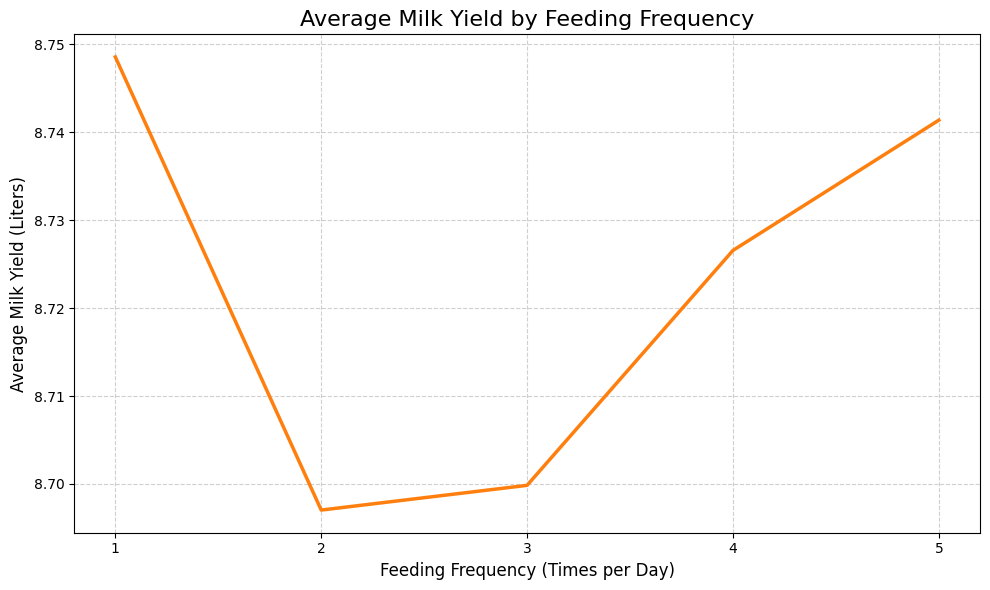

In [30]:
# Compute average milk yield by Feeding_Frequency
freq_yield = df.groupby('Feeding_Frequency')['Milk_Yield_L'].mean()

# Ensure the x-axis is sorted (in case frequencies are not in order)
freq_yield = freq_yield.sort_index()

# Create a clean line plot (no points)
plt.figure(figsize=(10, 6))
plt.plot(
    freq_yield.index,
    freq_yield.values,
    linewidth=2.5,
    color='#ff7f0e'  # nice orange color
)

plt.title('Average Milk Yield by Feeding Frequency', fontsize=16)
plt.xlabel('Feeding Frequency (Times per Day)', fontsize=12)
plt.ylabel('Average Milk Yield (Liters)', fontsize=12)
plt.xticks(freq_yield.index)  # show all frequency levels
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
grouped = [group["Milk_Yield_L"].values for name, group in df.groupby("Feeding_Frequency")]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("✅ There is a statistically significant difference between the mean Milk Yield across different body condition scores.")
else:
    print("❌ No statistically significant difference in the mean Milk Yield across Feeding Frequency.")

ANOVA Results:
F-statistic: 0.833
P-value: 0.50374
❌ No statistically significant difference in the mean Milk Yield across lactation stages.


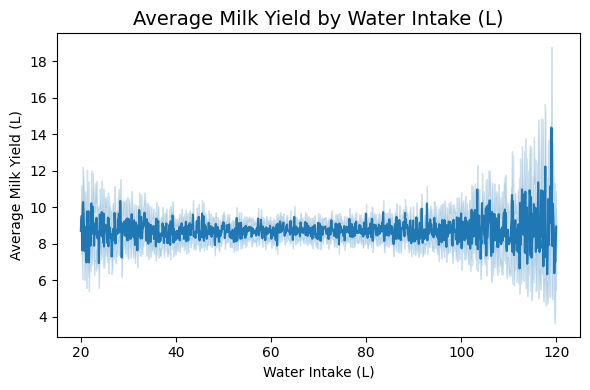

In [17]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Water_Intake_L', y='Milk_Yield_L')
plt.title('Average Milk Yield by Water Intake (L)', fontsize=14)
plt.xlabel('Water Intake (L)')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

No clear relationship between water intake and average milk yield. 

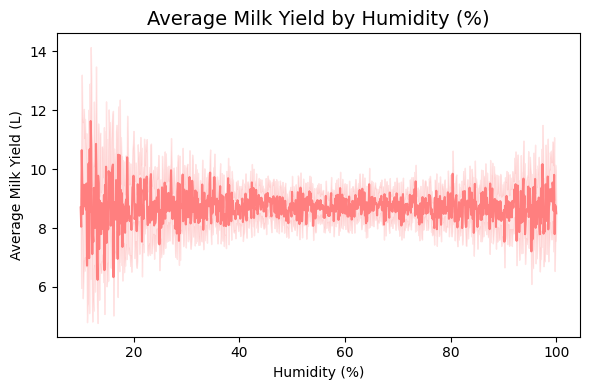

In [18]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Humidity_percent', y='Milk_Yield_L', color='#FF7F7F')
plt.title('Average Milk Yield by Humidity (%)', fontsize=14)
plt.xlabel('Humidity (%)')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

No clear relationship between humidity and Milk Yield.

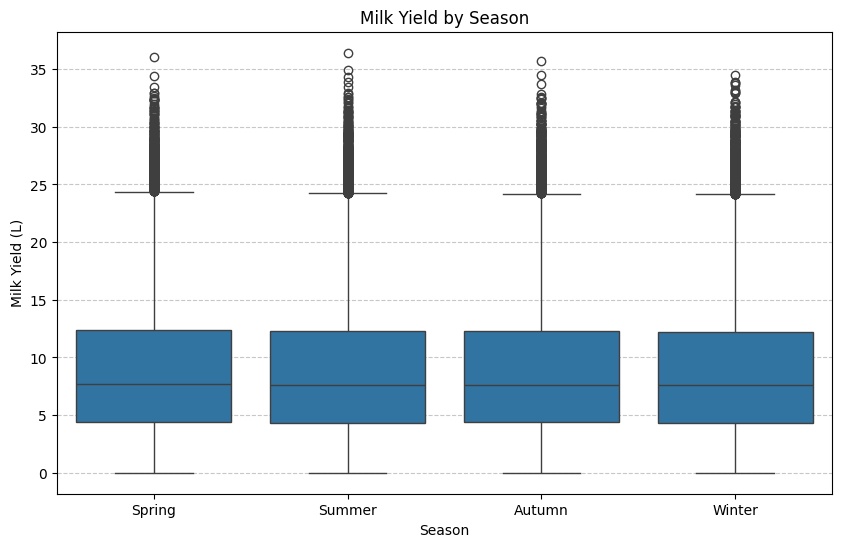

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='Milk_Yield_L', order=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.title('Milk Yield by Season')
plt.xlabel('Season')
plt.ylabel('Milk Yield (L)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No relationship between Seasons and Milk Yield.
Milk Yield is perfectly distributed across Seasons. 

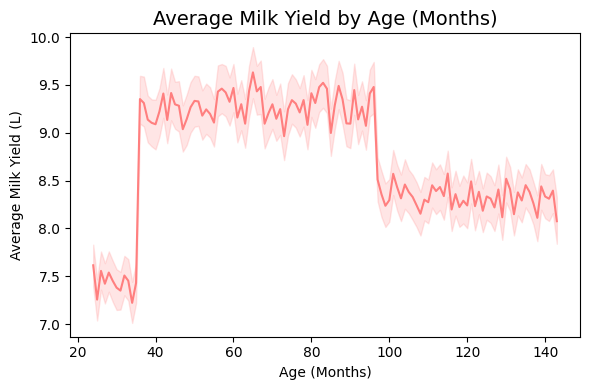

In [19]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Age_Months', y='Milk_Yield_L', color='#FF7F7F')
plt.title('Average Milk Yield by Age (Months)', fontsize=14)
plt.xlabel('Age (Months)')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

Average Milk Yield seems to be high around the age of 40 to around 90 months and lower when the cattle is both too young or too old. 

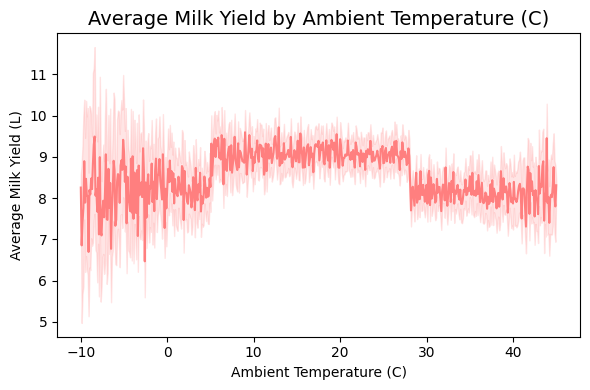

In [20]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Ambient_Temperature_C', y='Milk_Yield_L', color='#FF7F7F')
plt.title('Average Milk Yield by Ambient Temperature (C)', fontsize=14)
plt.xlabel('Ambient Temperature (C)')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

There seems to be an ideal ambient temperature for better milk yields, around 7 to 26 Celcius. 

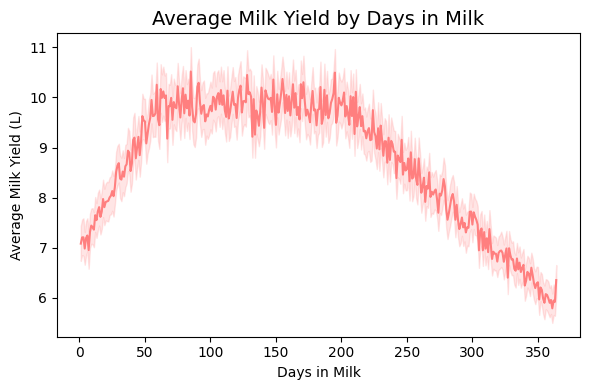

In [27]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Days_in_Milk', y='Milk_Yield_L', color='#FF7F7F')
plt.title('Average Milk Yield by Days in Milk', fontsize=14)
plt.xlabel('Days in Milk')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

This chart aligns with lactation cycles of cattle, peaks of milk yield are observedÀ after 60 days of giving birth and start 

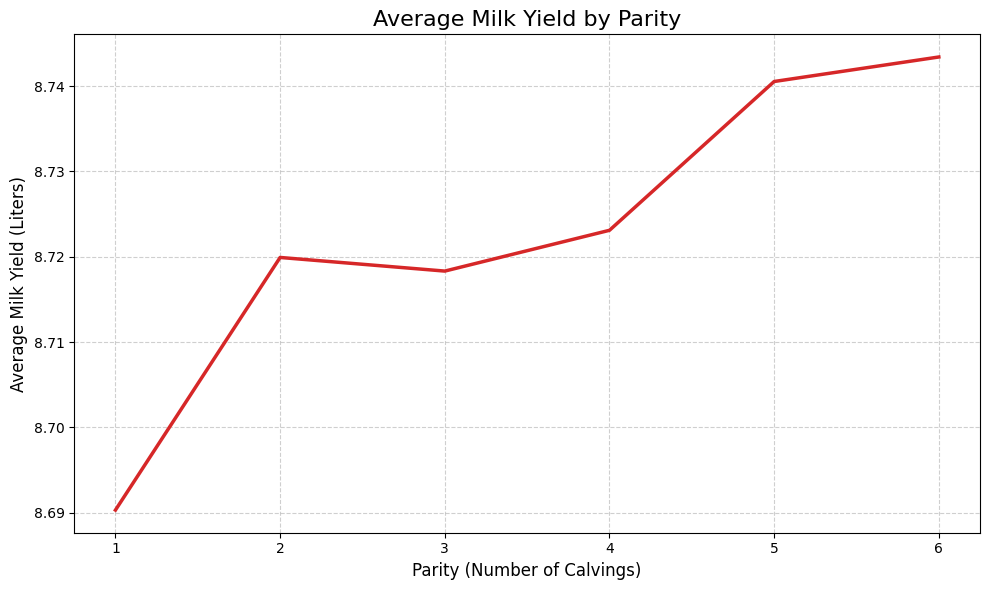

In [33]:
# Compute average milk yield by Parity
parity_yield = df.groupby('Parity')['Milk_Yield_L'].mean()

# Create a clean line plot (no points)
plt.figure(figsize=(10, 6))
plt.plot(
    parity_yield.index,
    parity_yield.values,
    linewidth=2.5,
    color='#d62728'  # nice red color
)

plt.title('Average Milk Yield by Parity', fontsize=16)
plt.xlabel('Parity (Number of Calvings)', fontsize=12)
plt.ylabel('Average Milk Yield (Liters)', fontsize=12)
plt.xticks(parity_yield.index)  # show all parity numbers
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/var/folders/xb/zq2zrn694mx618hvx_c05zzr0000gn/T/ipykernel_2019/148758189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


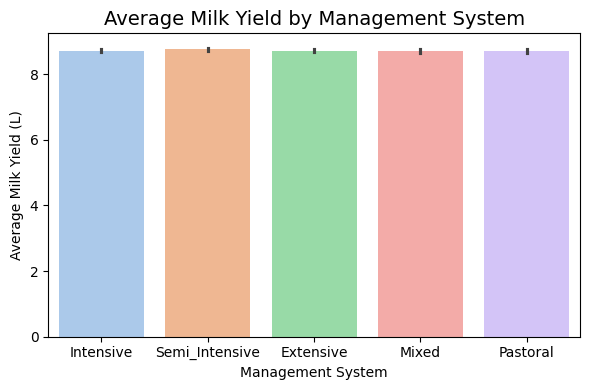

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x='Management_System', 
    y='Milk_Yield_L', 
    estimator='mean', 
    palette='pastel'
)

plt.title('Average Milk Yield by Management System', fontsize=14)
plt.xlabel('Management System')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

There is no clear difference between the average milk yield across the different management systems. We do not need to proceed with an ANOVA test for this category. 

/var/folders/xb/zq2zrn694mx618hvx_c05zzr0000gn/T/ipykernel_2019/1334718991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


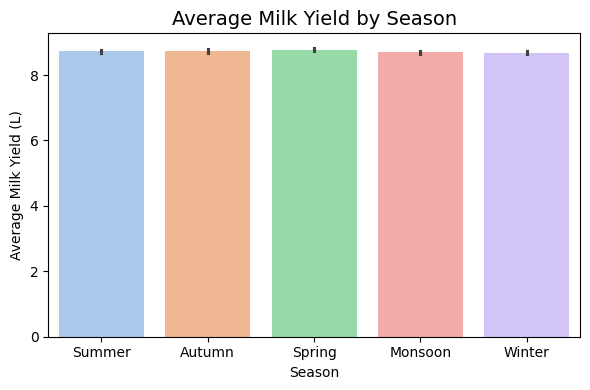

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x='Season', 
    y='Milk_Yield_L', 
    estimator='mean', 
    palette='pastel'
)

plt.title('Average Milk Yield by Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

Also for this one, no apparent difference is present between the different seasons. 

/var/folders/xb/zq2zrn694mx618hvx_c05zzr0000gn/T/ipykernel_2019/1963346900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


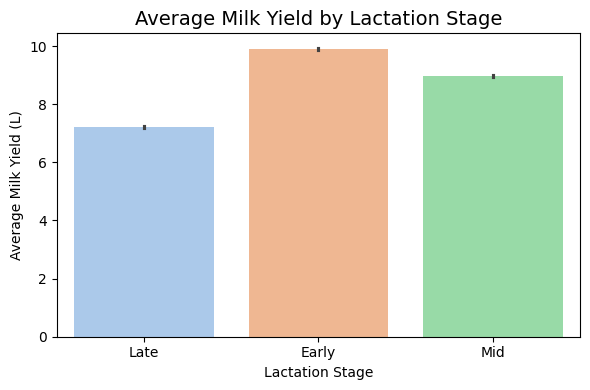

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x='Lactation_Stage', 
    y='Milk_Yield_L', 
    estimator='mean', 
    palette='pastel'
)

plt.title('Average Milk Yield by Lactation Stage', fontsize=14)
plt.xlabel('Lactation Stage')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

Since an important difference in means across lactation stages is clear, we wanted to verify if this difference is significant using an ANOVA test. 

In [ ]:
# Running an ANOVA one-way test to determine if the difference in Avg Milk Yield between lactation stages is significant
from scipy import stats

grouped = [group["Milk_Yield_L"].values for name, group in df.groupby("Lactation_Stage")]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("✅ There is a statistically significant difference between the mean Milk Yield across lactation stages.")
else:
    print("❌ No statistically significant difference in the mean Milk Yield across lactation stages.")

ANOVA Results:
F-statistic: 4391.069
P-value: 0.00000
✅ There is a statistically significant difference between the mean Milk Yield across lactation stages.


/var/folders/xb/zq2zrn694mx618hvx_c05zzr0000gn/T/ipykernel_2019/2788070306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


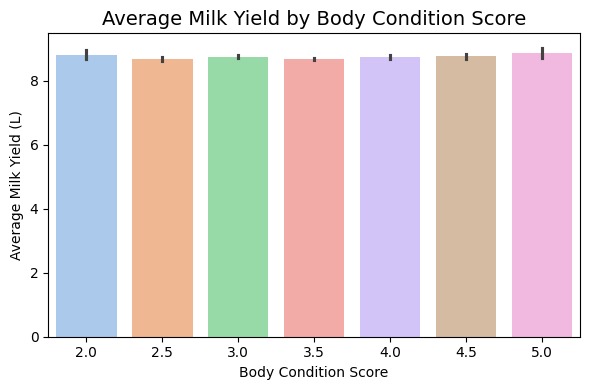

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x='Body_Condition_Score', 
    y='Milk_Yield_L', 
    estimator='mean', 
    palette='pastel'
)

plt.title('Average Milk Yield by Body Condition Score', fontsize=14)
plt.xlabel('Body Condition Score')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

There is a subtle difference in average milk yield across different body condition scores. We wanted to verify if this difference is significant using an ANOVA test.

In [ ]:
grouped = [group["Milk_Yield_L"].values for name, group in df.groupby("Body_Condition_Score")]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("✅ There is a statistically significant difference between the mean Milk Yield across different body condition scores.")
else:
    print("❌ No statistically significant difference in the mean Milk Yield across lactation stages.")

ANOVA Results:
F-statistic: 2.265
P-value: 0.03455
✅ There is a statistically significant difference between the mean Milk Yield across different body condition scores.


/var/folders/xb/zq2zrn694mx618hvx_c05zzr0000gn/T/ipykernel_2019/256108217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


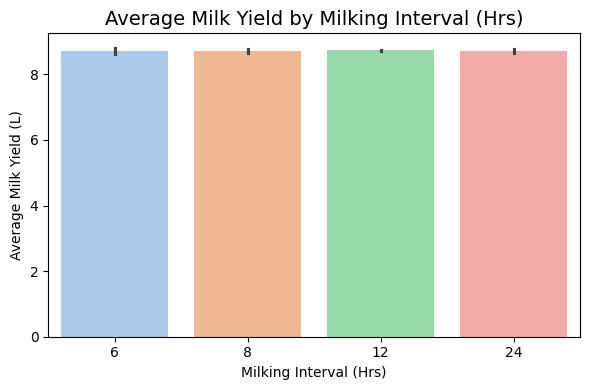

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x='Milking_Interval_hrs', 
    y='Milk_Yield_L', 
    estimator='mean', 
    palette='pastel'
)

plt.title('Average Milk Yield by Milking Interval (Hrs)', fontsize=14)
plt.xlabel('Milking Interval (Hrs)')
plt.ylabel('Average Milk Yield (L)')
plt.tight_layout()
plt.show()

In [ ]:
grouped = [group["Milk_Yield_L"].values for name, group in df.groupby("Milking_Interval_hrs")]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("✅ There is a statistically significant difference between the mean Milk Yield across Milking Intervals.")
else:
    print("❌ No statistically significant difference in the mean Milk Yield across different Milking Intervals.")

ANOVA Results:
F-statistic: 0.148
P-value: 0.93117
❌ No statistically significant difference in the mean Milk Yield across different Milking Intervals.


We have gained a nice understanding of our dataset. Next notebook will be used for feature engineering and preparing the variables for model building.